In [74]:
import redis
import hashlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

# Notebook para lectura de datos guardados en Redis.

In [75]:
# Conectamos al servidor redis (correr el docker compose previamente, sino no funcionará)
r = redis.Redis(host='localhost', port=6379, decode_responses=True)

In [96]:
# Obtención de datos para prueba
df_temp = pd.read_csv("./data_playlist_batch.csv")

# Sampleamos 10 valores al azar
HIGH_LINEAR_CORRELATION_VARIABLES= ['danceability','energy','speechiness']
df_temp =  df_temp[HIGH_LINEAR_CORRELATION_VARIABLES]
df_temp = df_temp.reset_index(drop=True)
df_temp = df_temp.sample(10)
test_values = df_temp.values.tolist()

# Conversión de valores a cadenas y hash
string_values = [' '.join(map(str, sublist)) for sublist in test_values]
hashed_values = [hashlib.sha256(substring.encode()).hexdigest() for substring in string_values]  

# Obtención de las salidas del modelo desde Redis
# Estas salidas ya fueron procesadas en el pasado, por lo que consultamos Redis para obtenerlas.
model_output = [r.get(hash_key) for hash_key in hashed_values]

# Reemplazo de valores nulos con un valor predeterminado
model_output = [value if value is not None else "NOT PROCESSED YET" for value in model_output]

Veamos la salida del modelo para diferentes entradas:

In [97]:
# Realizamos la predicción para los valores tomados al azar
for index, test_value in enumerate(test_values):
    print(f"Para la entrada: {test_value} el modelo predice que: {model_output[index]}")

Para la entrada: [0.414, 0.49, 0.0365] el modelo predice que: PLAYLIST
Para la entrada: [0.601, 0.99, 0.337] el modelo predice que: NO_PLAYLIST
Para la entrada: [0.579, 0.221, 0.0478] el modelo predice que: PLAYLIST
Para la entrada: [0.71, 0.784, 0.0416] el modelo predice que: NO_PLAYLIST
Para la entrada: [0.686, 0.372, 0.0358] el modelo predice que: PLAYLIST
Para la entrada: [0.576, 0.376, 0.139] el modelo predice que: PLAYLIST
Para la entrada: [0.426, 0.619, 0.0768] el modelo predice que: NO_PLAYLIST
Para la entrada: [0.769, 0.764, 0.175] el modelo predice que: NO_PLAYLIST
Para la entrada: [0.507, 0.665, 0.0474] el modelo predice que: NO_PLAYLIST
Para la entrada: [0.615, 0.21, 0.0534] el modelo predice que: PLAYLIST


In [98]:
# Represaremos graficamente a estos datos

# Creación del DataFrame
test_values_df = pd.DataFrame(test_values)
test_values_df = pd.concat([test_values_df, pd.Series(model_output, name="label")], axis=1)
test_values_df.columns = ["danceability", "energy", "speechiness", "label"]

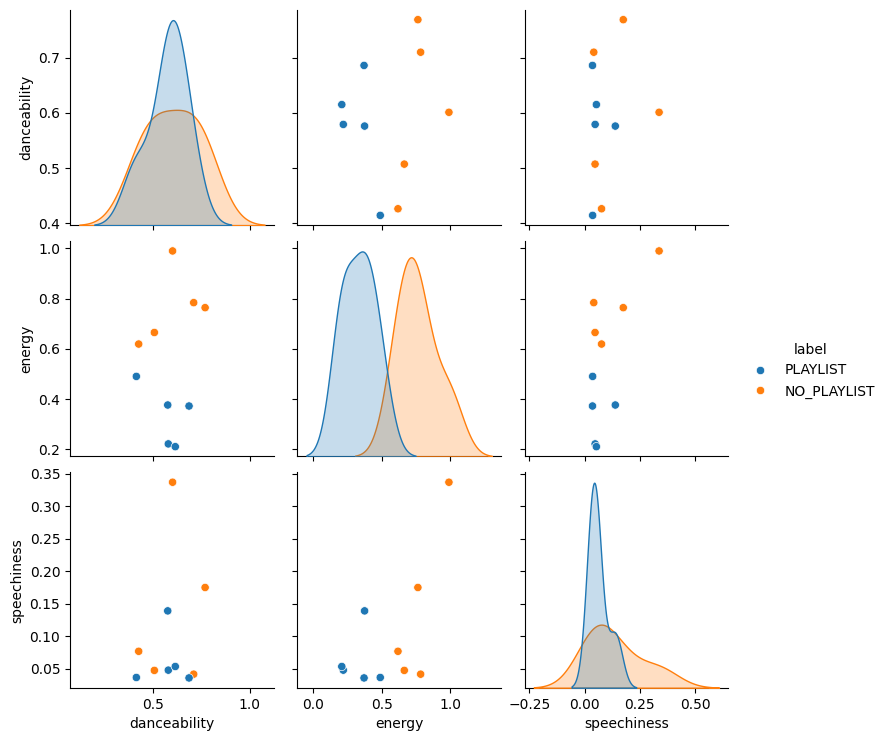

In [99]:
# Creamos el pairplot para mostrar la relación entre las varaibles en 2D
sns.pairplot(test_values_df, hue='label', hue_order=['PLAYLIST', 'NO_PLAYLIST'])
plt.show()

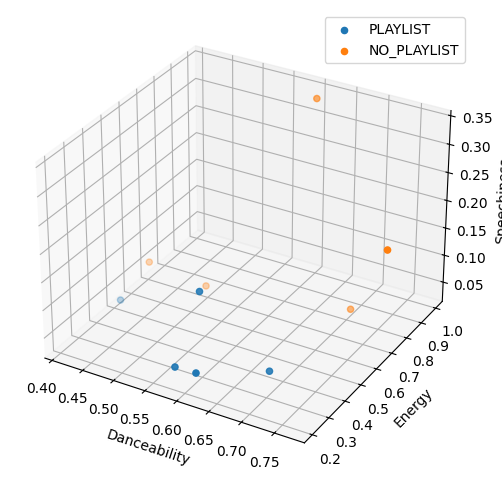

In [100]:
# Creamos la figura donde vamos a mostrar la relación entre las varaibles en 3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Asignamos un color la punto en función del label
for label in test_values_df['label'].unique():
    data = test_values_df[test_values_df['label'] == label]
    ax.scatter(data['danceability'], data['energy'], data['speechiness'], label=label)

# Nombramos los ejes
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Speechiness')

# Mostramos la leyenda
ax.legend()

# Mostramos la imagen
plt.show()